<a href="https://colab.research.google.com/github/PRASANNA-416/EC386-Image-processing-Project/blob/main/EC386_with_efficientNetB0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from keras.layers import Conv2D, Input, MaxPool2D,Flatten, Dense, Permute, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import keras
from keras.models import Sequential
# from keras.applications.resnet50.ResNet50 import ResNet50
# from keras.applications.resnet50 import Dense
from keras.layers import Dropout
from keras.applications.efficientnet import EfficientNetB0
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.efficientnet import EfficientNetB0, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
import tensorflow as tf


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)

In [4]:
train_it = datagen.flow_from_directory('/content/gdrive/MyDrive/Mini_Project/Train', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='categorical', 
                                       batch_size=5)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('/content/gdrive/MyDrive/Mini_Project/Test', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='categorical', 
                                      batch_size=5)

Found 132 images belonging to 3 classes.
Found 31 images belonging to 3 classes.


In [5]:
EfficientNet_model = Sequential()
pretrained_model = EfficientNetB0(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

16705208/16705208 [==============================] - 1s 0us/step


In [6]:
for layer in pretrained_model.layers:
        layer.trainable=False

EfficientNet_model.add(pretrained_model)

In [7]:
EfficientNet_model.add(Flatten())
EfficientNet_model.add(Dense(512, activation='relu'))
EfficientNet_model.add(Dense(128, activation='relu'))
EfficientNet_model.add(Dense(3, activation='softmax'))

In [8]:
EfficientNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 512)               32113152  
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 36,228,774
Trainable params: 32,179,203
Non-trainable params: 4,049,571
_________________________________________________________________


In [9]:
EfficientNet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes = 3

n_steps = 10 
n_val_steps = 5
n_epochs = 30

In [11]:
history = EfficientNet_model.fit(train_it,
                            batch_size= 5 ,
                            epochs= 20,
                            validation_data= valid_it,
                            steps_per_epoch= 10,
                            validation_steps= 3,
                            verbose=1)

Epoch 1/20
10/10 [==============================] - 51s 4s/step - loss: 3.3956 - accuracy: 0.6200 - val_loss: 4.5787 - val_accuracy: 0.6667
Epoch 2/20
10/10 [==============================] - 27s 3s/step - loss: 4.4296 - accuracy: 0.7400 - val_loss: 2.1791 - val_accuracy: 0.8667
Epoch 3/20
10/10 [==============================] - 16s 2s/step - loss: 7.1480 - accuracy: 0.7234 - val_loss: 3.4772 - val_accuracy: 0.8000
Epoch 4/20
10/10 [==============================] - 12s 1s/step - loss: 3.7383 - accuracy: 0.8511 - val_loss: 0.3574 - val_accuracy: 0.8667
Epoch 5/20
10/10 [==============================] - 9s 832ms/step - loss: 3.3065 - accuracy: 0.7000 - val_loss: 1.8799 - val_accuracy: 0.8000
Epoch 6/20
10/10 [==============================] - 8s 761ms/step - loss: 2.5160 - accuracy: 0.7872 - val_loss: 1.1033 - val_accuracy: 0.8667
Epoch 7/20
10/10 [==============================] - 8s 814ms/step - loss: 1.8579 - accuracy: 0.7660 - val_loss: 6.2785 - val_accuracy: 0.8000
Epoch 8/20
10/

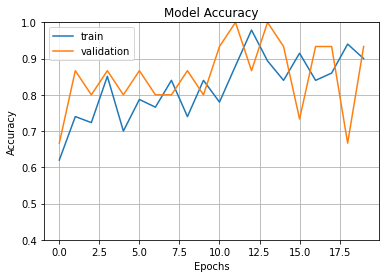

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()